[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Shape: (55518, 4)
Missing Values:
subreddit    0
text         0
id           0
label        0
dtype: int64
Unique subreddits: 17
Label distribution:
label
1    37825
0    17693
Name: count, dtype: int64


<ipython-input-8-f1192db925b1>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette="viridis")


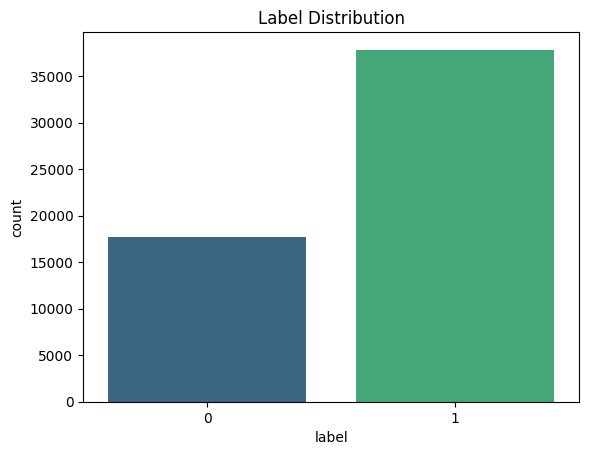

<Figure size 640x480 with 0 Axes>

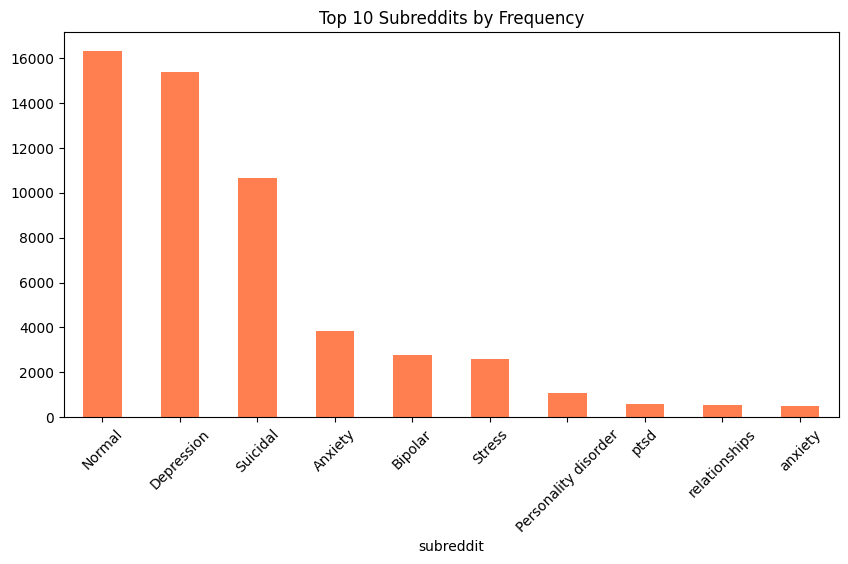

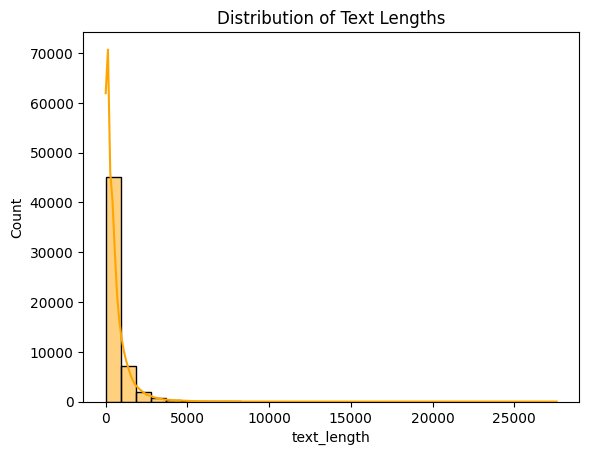

<Figure size 640x480 with 0 Axes>

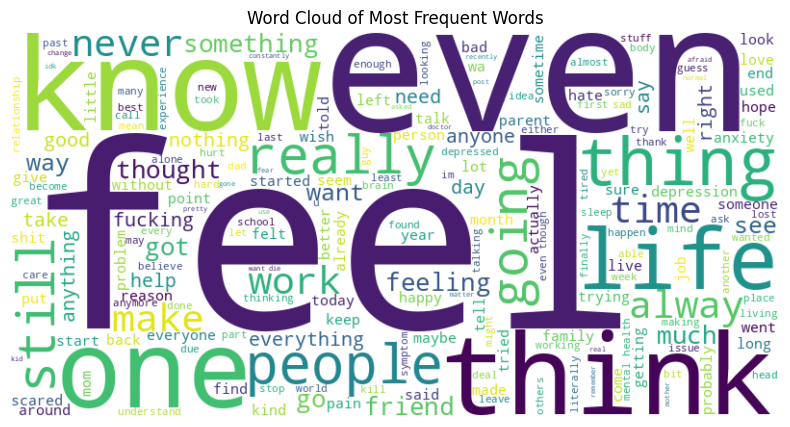

<ipython-input-8-f1192db925b1>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="magma")


<Figure size 640x480 with 0 Axes>

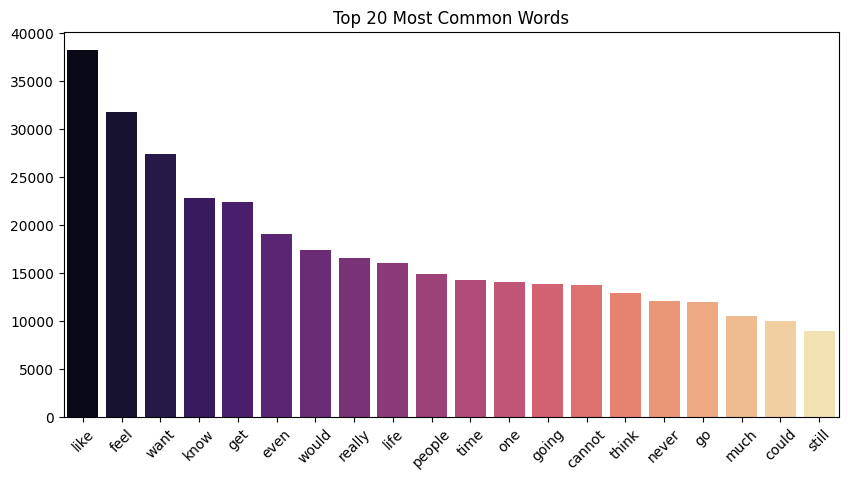

<ipython-input-8-f1192db925b1>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(top_tfidf_words)[sorted_indices[:20]], y=tfidf_values[sorted_indices[:20]], palette="rocket")


<Figure size 640x480 with 0 Axes>

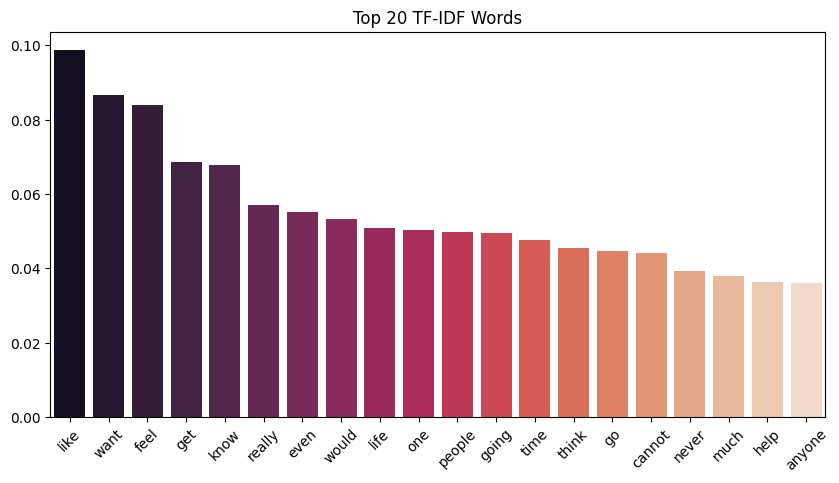

<ipython-input-8-f1192db925b1>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(bigram_words), y=list(bigram_counts), palette="cubehelix")


<Figure size 640x480 with 0 Axes>

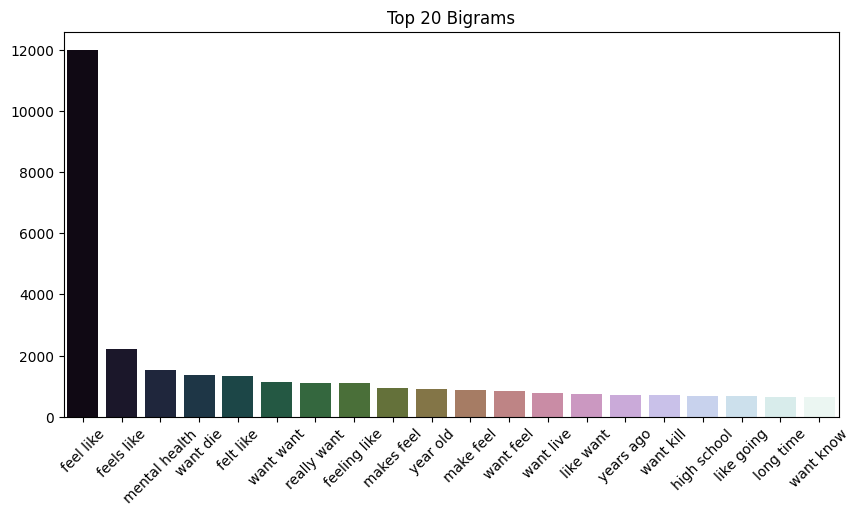

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
nltk.download('stopwords')

# Load dataset
df = pd.read_csv("Final_Cleaned.csv")

# Basic statistics
print("Dataset Shape:", df.shape)
print("Missing Values:")
print(df.isnull().sum())
print("Unique subreddits:", df['subreddit'].nunique())
print("Label distribution:")
print(df['label'].value_counts())

# Plot label distribution
sns.countplot(x=df['label'], palette="viridis")
plt.title("Label Distribution")
plt.show()
plt.savefig("label_distribution.png")

# Subreddit distribution (Top 10)
plt.figure(figsize=(10, 5))
df['subreddit'].value_counts().nlargest(10).plot(kind='bar', color='coral')
plt.title("Top 10 Subreddits by Frequency")
plt.xticks(rotation=45)
plt.show()
plt.savefig("subreddit_distribution.png")

# Text length analysis
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=30, kde=True, color='orange')
plt.title("Distribution of Text Lengths")
plt.show()
plt.savefig("text_length_distribution.png")

# Word cloud of most common words
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    words = text.lower().split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['processed_text'] = df['text'].apply(preprocess_text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Most Frequent Words")
plt.show()
plt.savefig("wordcloud.png")

# Most common words
word_counts = Counter(" ".join(df['processed_text']).split())
common_words = word_counts.most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="magma")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words")
plt.show()
plt.savefig("common_words.png")

# TF-IDF Analysis
tfidf_vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
top_tfidf_words = tfidf_vectorizer.get_feature_names_out()

tfidf_values = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
sorted_indices = np.argsort(tfidf_values)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(top_tfidf_words)[sorted_indices[:20]], y=tfidf_values[sorted_indices[:20]], palette="rocket")
plt.xticks(rotation=45)
plt.title("Top 20 TF-IDF Words")
plt.show()
plt.savefig("tfidf_words.png")

# Bigram Analysis
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform(df['processed_text'])
bigram_counts = X.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()

bigram_freq = dict(zip(bigram_features, bigram_counts))
bigram_sorted = sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:20]

bigram_words, bigram_counts = zip(*bigram_sorted)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(bigram_words), y=list(bigram_counts), palette="cubehelix")
plt.xticks(rotation=45)
plt.title("Top 20 Bigrams")
plt.show()
plt.savefig("bigrams.png")
